In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Untitled folder/fish.csv')

In [8]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


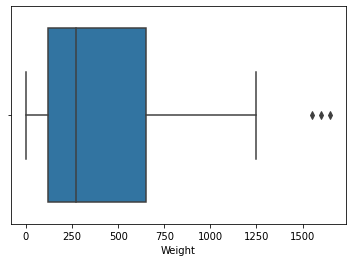

In [ ]:
sns.boxplot(x=df['Weight'])

In [ ]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)

In [ ]:
Q1

120.0

In [ ]:
Q3

650.0

In [ ]:
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [ ]:
df[((df['Weight'] < low_fence) | (df['Weight'] > up_fence))]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [ ]:
df = df[~((df['Weight'] < low_fence) | (df['Weight'] > up_fence))]

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


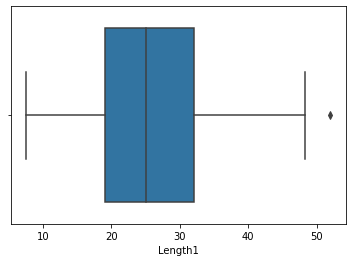

In [ ]:
sns.boxplot(x=df['Length1'])

In [ ]:
df1 = df['Length1']
df1_Q1 = df1.quantile(0.25)
df1_Q3 = df1.quantile(0.75)
df1_IQR = df1_Q3 - df1_Q1
df1_lowerend = df1_Q1 - (1.5 * df1_IQR)
df1_upperend = df1_Q3 + (1.5 * df1_IQR)

df1_outliers = df1[(df1 < df1_lowerend) | (df1 > df1_upperend)]
df1_outliers

141    52.0
Name: Length1, dtype: float64

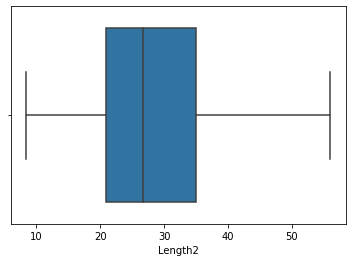

In [ ]:
sns.boxplot(x=df['Length2'])

In [ ]:
df2 = df['Length2']
df2_Q1 = df2.quantile(0.25)
df2_Q3 = df2.quantile(0.75)
df2_IQR = df2_Q3 - df2_Q1
df2_lowerend = df2_Q1 - (1.5 * df2_IQR)
df2_upperend = df2_Q3 + (1.5 * df2_IQR)

df2_outliers = df2[(df2 < df2_lowerend) | (df2 > df2_upperend)]
df2_outliers

Series([], Name: Length2, dtype: float64)

In [ ]:
df3 = df['Length3']
df3_Q1 = df3.quantile(0.25)
df3_Q3 = df3.quantile(0.75)
df3_IQR = df3_Q3 - df3_Q1
df3_lowerend = df3_Q1 - (1.5 * df3_IQR)
df3_upperend = df3_Q3 + (1.5 * df3_IQR)

df3_outliers = df3[(df3 < df3_lowerend) | (df3 > df3_upperend)]
df3_outliers

Series([], Name: Length3, dtype: float64)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
151,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
152,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
153,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
154,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Weight']
X = df.drop(columns=['Species', 'Weight'])

In [ ]:
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
151,11.5,12.2,13.4,2.0904,1.3936
152,11.7,12.4,13.5,2.4300,1.2690
153,12.1,13.0,13.8,2.2770,1.2558
154,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
151     12.2
152     13.4
153     12.2
154     19.7
155     19.9
Name: Weight, Length: 156, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

,Length1,Length2,Length3,Height,Width
93,20.7,22.7,24.2,5.9532,3.6300
135,40.0,42.5,45.5,6.8250,4.4590
56,24.1,26.5,29.3,8.1454,4.2485
122,37.1,40.0,42.5,11.1350,6.6300
141,52.0,56.0,59.7,10.6863,6.9849
...,...,...,...,...,...
63,16.3,17.7,19.8,7.4052,2.6730
22,31.5,34.5,39.7,15.5227,5.2801
96,22.0,24.0,25.5,7.2930,3.7230
10,28.4,31.0,36.2,14.2628,5.1042


In [ ]:
X_test

,Length1,Length2,Length3,Height,Width
140,48.3,51.7,55.1,8.9262,6.1712
2,23.9,26.5,31.1,12.3778,4.6961
109,30.5,32.8,34.0,10.0300,6.0180
25,31.8,35.0,40.9,16.3600,6.0532
35,12.9,14.1,16.2,4.1472,2.2680
48,22.0,24.0,27.2,7.5344,3.8352
80,17.8,19.6,20.8,5.1376,3.0368
134,40.0,42.5,45.5,7.2800,4.3225
55,23.6,26.0,28.7,8.3804,4.2476
15,29.4,32.0,37.2,15.4380,5.5800


In [ ]:
y_train

93      145.0
135     510.0
56      270.0
122     820.0
141    1250.0
        ...  
63       90.0
22      620.0
96      225.0
10      475.0
28      850.0
Name: Weight, Length: 109, dtype: float64

In [ ]:
y_test

140     950.0
2       340.0
109     514.0
25      725.0
35       40.0
48      169.0
80       85.0
134     456.0
55      270.0
15      600.0
105     250.0
7       390.0
6       500.0
83      115.0
123    1100.0
9       500.0
101     218.0
127    1000.0
151      12.2
71      300.0
110     556.0
106     250.0
8       450.0
126    1000.0
68      145.0
113     700.0
97      145.0
72        5.9
21      685.0
69      200.0
47      160.0
147       8.7
19      650.0
73       32.0
70      273.0
114     700.0
91      130.0
3       363.0
107     300.0
118     820.0
154      19.7
94      150.0
145       9.7
146       9.8
103     260.0
149       9.9
102     300.0
Name: Weight, dtype: float64

In [ ]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (109, 5)
y_train:  (109,)
X_test:  (47, 5)
y_test:  (47,)


In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [ ]:
X_train[['Height']] = min_max_scaler.fit_transform(X_train[['Height']])
X_test[['Height']] = min_max_scaler.fit_transform(X_test[['Height']])
X_train[['Length1']] = min_max_scaler.fit_transform(X_train[['Length1']])
X_test[['Length1']] = min_max_scaler.fit_transform(X_test[['Length1']])
X_train[['Length2']] = min_max_scaler.fit_transform(X_train[['Length2']])
X_test[['Length2']] = min_max_scaler.fit_transform(X_test[['Length2']])
X_train[['Length3']] = min_max_scaler.fit_transform(X_train[['Length3']])
X_test[['Length3']] = min_max_scaler.fit_transform(X_test[['Length3']])
X_train[['Width']] = min_max_scaler.fit_transform(X_train[['Width']])
X_test[['Width']] = min_max_scaler.fit_transform(X_test[['Width']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
X_train

,Length1,Length2,Length3,Height,Width
93,0.266979,0.279221,0.274029,0.245220,0.382685
135,0.718970,0.707792,0.709611,0.295822,0.505535
56,0.346604,0.361472,0.378323,0.372462,0.474341
122,0.651054,0.653680,0.648262,0.545987,0.827255
141,1.000000,1.000000,1.000000,0.519944,0.879848
...,...,...,...,...,...
63,0.163934,0.170996,0.184049,0.329499,0.240868
22,0.519906,0.534632,0.591002,0.800663,0.627214
96,0.297424,0.307359,0.300613,0.322986,0.396467
10,0.447307,0.458874,0.519427,0.727534,0.601147


In [ ]:
X_test

,Length1,Length2,Length3,Height,Width
140,1.000000,1.000000,1.000000,0.483111,0.717493
2,0.401961,0.418014,0.481641,0.723108,0.506042
109,0.563725,0.563510,0.544276,0.559860,0.695532
25,0.595588,0.614319,0.693305,1.000000,0.700578
35,0.132353,0.131640,0.159827,0.150816,0.157982
48,0.355392,0.360277,0.397408,0.386336,0.382635
80,0.252451,0.258661,0.259179,0.219680,0.268187
134,0.796569,0.787529,0.792657,0.368646,0.452488
55,0.394608,0.406467,0.429806,0.445160,0.441751
15,0.536765,0.545035,0.613391,0.935891,0.632746


In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

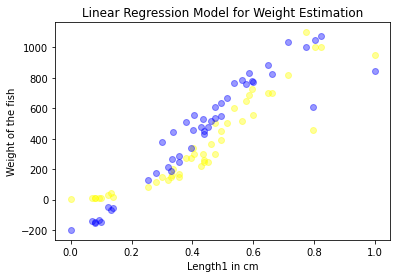

In [ ]:
plt.scatter(X_test['Length1'], y_test, color='yellow', alpha=0.4)
plt.scatter(X_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length1 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

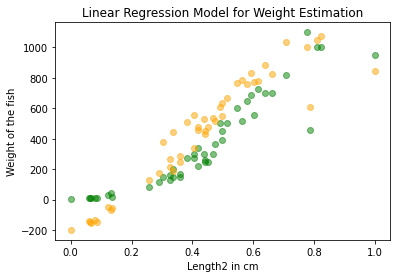

In [ ]:
plt.scatter(X_test['Length2'], y_test, color='green', alpha=0.5)
plt.scatter(X_test['Length2'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Length2 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

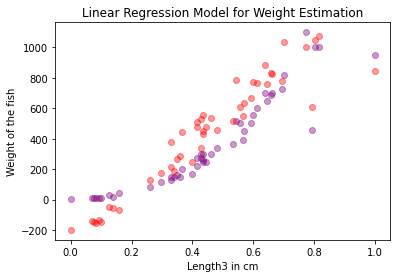

In [ ]:
plt.scatter(X_test['Length3'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['Length3'], y_pred, color='red', alpha=0.4)
plt.xlabel('Length3 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

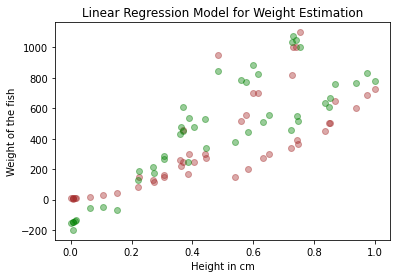

In [ ]:
plt.scatter(X_test['Height'], y_test, color='brown', alpha=0.4)
plt.scatter(X_test['Height'], y_pred, color='green', alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

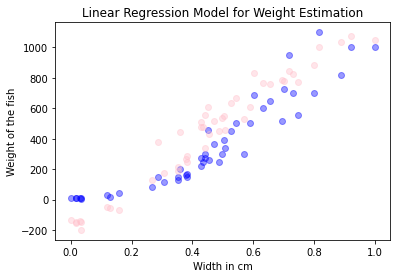

In [ ]:
plt.scatter(X_test['Width'], y_test, color='blue', alpha=0.4)
plt.scatter(X_test['Width'], y_pred, color='pink', alpha=0.4)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

In [ ]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -218.51871161178315
Model coefficients:  [ 5555.75638943 -1965.07941147 -3171.87404036   882.72924578
   301.821312  ]


In [ ]:
r2_score(y_test, y_pred)

0.7067522826342583

In [ ]:
mean_squared_error(y_test, y_pred)

26390.00210386442

In [ ]:
class GDLinearRegression:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    def predict(self, X):
        return self.net_input(X)
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = [ ]
        for n_iters in range(self.max_iter):
            error = y - self.predict(X)
            self.w[1:] += self.eta * X.T.dot(error)
            self.w[0] += self.eta * error.sum()
            cost = (error**2).sum()/2
            self.costs.append(cost)

In [ ]:
reg_GD = GDLinearRegression(eta=0.0025, max_iter=35, random_state=1)
reg_GD.fit(X_train, y_train)

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

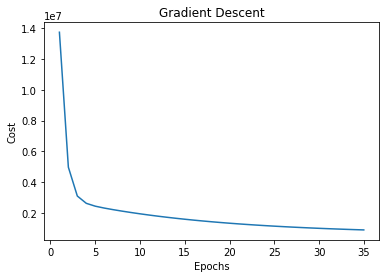

In [ ]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [ ]:
w_GD = reg_GD.w
w_GD

array([-83.8501662 , 207.11195436, 206.12714835, 214.17187122,
       242.01261372, 260.46909763])

In [ ]:
print('MSE of GD:', mean_squared_error(y_test, y_pred_GD))

MSE of GD: 15320.07480175187


In [ ]:
print('R2 of GD:', r2_score(y_test, y_pred_GD ))

R2 of GD: 0.8297621596313445


In [11]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg_SGD = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([114.09285708, 130.95745843, 131.63004788, 137.35754338,
       145.58746397, 161.78908914])

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
print('MAE of SGD:', mean_squared_error(y_test, y_pred_SGD))

MAE of SGD: 29532.803531331574


In [ ]:
print('R2 of SGD:', r2_score(y_test, y_pred_SGD))

R2 of SGD: 0.671829233325233


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Untitled folder/insurance.csv')

In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(str('Is there any NaN value in the dataset: '), df_1.isnull().values.any())

Is there any NaN value in the dataset:  False


In [ ]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
countNULL = df_1.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

In [ ]:
df_1_remove = df_1.dropna(inplace=False)

In [ ]:
df_1_remove

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_1.dropna(inplace=True)

In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
mean_age = df_1['age'].mean()
mean_age

39.20702541106129

In [ ]:
median_bmi = df_1['bmi'].median()
median_bmi

30.4

In [ ]:
mode_region = df_1['region'].mode()[0]
mode_region 

'southeast'

In [ ]:
mode_children = df_1['children'].mode()[0]
mode_children

0

In [ ]:
df_1['age'].fillna(value=int(mean_age), inplace=True)
df_1['bmi'].fillna(value=median_bmi, inplace=True)
df_1['region'].fillna(value=mode_region, inplace=True)
df_1['children'].fillna(value=mode_children, inplace=True)

In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


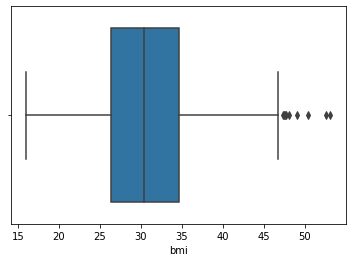

In [ ]:
sns.boxplot(df_1['bmi'])

In [ ]:
Q1 = df_1['bmi'].quantile(0.25)
Q3 = df_1['bmi'].quantile(0.75)

In [ ]:
Q1

26.29625

In [ ]:
Q3

34.69375

In [ ]:
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [ ]:
df_1[((df_1['bmi'] < low_fence) | (df_1['bmi'] > up_fence))]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [ ]:
df_1 = df_1[~((df_1['bmi'] < low_fence) | (df_1['bmi'] > up_fence))]

In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


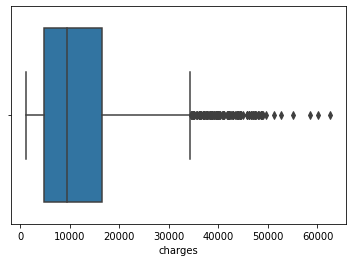

In [ ]:
sns.boxplot(df_1['charges'])

In [ ]:
df1 = df_1['charges']
df1_Q1 = df1.quantile(0.25)
df1_Q3 = df1.quantile(0.75)
df1_IQR = df1_Q3 - df1_Q1
df1_lowerend = df1_Q1 - (1.5 * df1_IQR)
df1_upperend = df1_Q3 + (1.5 * df1_IQR)

df1_outliers = df1[(df1 < df1_lowerend) | (df1 > df1_upperend)]
df1_outliers

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 138, dtype: float64

In [ ]:
df_1.reset_index(drop=True, inplace=True)
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_1['sex'] = label_encoder.fit_transform(df_1['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,1,30.970,3,no,northwest,10600.54830
1325,18,0,31.920,0,no,northeast,2205.98080
1326,18,0,36.850,0,no,southeast,1629.83350
1327,21,0,25.800,0,no,southwest,2007.94500


In [ ]:
df_1['smoker'] = label_encoder.fit_transform(df_1['smoker'])
df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,northwest,10600.54830
1325,18,0,31.920,0,0,northeast,2205.98080
1326,18,0,36.850,0,0,southeast,1629.83350
1327,21,0,25.800,0,0,southwest,2007.94500


In [16]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [ ]:
name_col = 'region'

In [ ]:
data_new = onehot_encoder.fit_transform(df_1[[name_col]])
region_column = pd.DataFrame(data=data_new, columns=onehot_encoder.get_feature_names([name_col]))

In [ ]:
df_1 = pd.concat([df_1.drop(columns=[name_col, 'charges']), region_column, df_1['charges']], axis=1)
df_1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1325,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1326,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1327,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


In [ ]:
X1 = df_1.drop(columns=['charges'])
y1 = df_1['charges']

In [ ]:
X1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1325,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1326,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1327,21,0,25.800,0,0,0.0,0.0,0.0,1.0


In [ ]:
y1

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1324    10600.54830
1325     2205.98080
1326     1629.83350
1327     2007.94500
1328    29141.36030
Name: charges, Length: 1329, dtype: float64

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [ ]:
X1_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1070,21,1,26.030,0,0,1.0,0.0,0.0,0.0
356,23,1,41.910,0,0,0.0,0.0,1.0,0.0
132,19,1,25.555,0,0,0.0,1.0,0.0,0.0
942,42,1,31.255,0,0,0.0,1.0,0.0,0.0
816,45,1,33.700,1,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
562,38,0,40.565,1,0,0.0,1.0,0.0,0.0
290,25,1,45.540,2,1,0.0,0.0,1.0,0.0
1287,20,1,22.000,1,0,0.0,0.0,0.0,1.0
236,31,1,38.390,2,0,0.0,0.0,1.0,0.0


In [ ]:
X1_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1288,18,1,26.125,0,0,1.0,0.0,0.0,0.0
1235,28,0,33.110,0,0,0.0,0.0,1.0,0.0
86,57,0,31.160,0,1,0.0,1.0,0.0,0.0
1084,23,1,32.700,3,0,0.0,0.0,0.0,1.0
784,29,1,22.515,3,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1160,32,1,35.200,2,0,0.0,0.0,0.0,1.0
930,44,1,29.735,2,0,1.0,0.0,0.0,0.0
1191,31,0,25.800,2,0,0.0,0.0,0.0,1.0
193,18,1,34.430,0,0,0.0,0.0,1.0,0.0


In [ ]:
y1_train

1070     2102.26470
356      1837.28190
132      1632.56445
942      6358.77645
816      7445.91800
           ...     
562      6373.55735
290     42112.23560
1287     1964.78000
236      4463.20510
300     12265.50690
Name: charges, Length: 930, dtype: float64

In [ ]:
y1_test

1288     1708.92575
1235     3171.61490
86      43578.93940
1084     3591.48000
784      5209.57885
           ...     
1160     4670.64000
930     32108.66282
1191     4934.70500
193      1137.46970
1154    18963.17192
Name: charges, Length: 399, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [ ]:
X1_train[['bmi']] = min_max_scaler.fit_transform(X1_train[['bmi']])
X1_test[['bmi']] = min_max_scaler.fit_transform(X1_test[['bmi']])
X1_train[['age']] = min_max_scaler.fit_transform(X1_train[['age']])
X1_test[['age']] = min_max_scaler.fit_transform(X1_test[['age']])
X1_train[['children']] = min_max_scaler.fit_transform(X1_train[['children']])
X1_test[['children']] = min_max_scaler.fit_transform(X1_test[['children']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
X1_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1070,0.065217,1,0.327054,0.0,0,1.0,0.0,0.0,0.0
356,0.108696,1,0.842806,0.0,0,0.0,0.0,1.0,0.0
132,0.021739,1,0.311627,0.0,0,0.0,1.0,0.0,0.0
942,0.521739,1,0.496752,0.0,0,0.0,1.0,0.0,0.0
816,0.586957,1,0.576161,0.2,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
562,0.434783,0,0.799123,0.2,0,0.0,1.0,0.0,0.0
290,0.152174,1,0.960702,0.4,1,0.0,0.0,1.0,0.0
1287,0.043478,1,0.196168,0.2,0,0.0,0.0,0.0,1.0
236,0.282609,1,0.728483,0.4,0,0.0,0.0,1.0,0.0


In [ ]:
X1_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1288,0.000000,1,0.304415,0.0,0,1.0,0.0,0.0,0.0
1235,0.217391,0,0.542526,0.0,0,0.0,0.0,1.0,0.0
86,0.847826,0,0.476052,0.0,1,0.0,1.0,0.0,0.0
1084,0.108696,1,0.528550,0.6,0,0.0,0.0,0.0,1.0
784,0.239130,1,0.181353,0.6,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1160,0.304348,1,0.613772,0.4,0,0.0,0.0,0.0,1.0
930,0.565217,1,0.427476,0.4,0,1.0,0.0,0.0,0.0
1191,0.282609,0,0.293336,0.4,0,0.0,0.0,0.0,1.0
193,0.000000,1,0.587523,0.0,0,0.0,0.0,1.0,0.0


In [ ]:
reg1 = LinearRegression()
reg1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred1 = reg1.predict(X1_test)

In [ ]:
print('Model intercept: ', reg1.intercept_)
print('Model coefficients: ', reg1.coef_)

Model intercept:  -2351.9488445228253
Model coefficients:  [11606.98381423  -252.93913142 10725.34471654  2434.88407766
 23390.11571812   536.84100312   236.85445968  -512.79896964
  -260.89649315]


In [ ]:
r2_score(y1_test, y_pred1)

0.7853688448058082

In [ ]:
mean_squared_error(y1_test, y_pred1)

31474028.556069646

In [ ]:
class GD_LinearRegression:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    def net_input(self, X1):
        return np.dot(X1, self.w[1:]) + self.w[0]
    def predict(self, X1):
        return self.net_input(X1)
    def fit(self, X1, y1):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X1.shape[1])
        self.costs = [ ]
        for n_iters in range(self.max_iter):
            error = y1 - self.predict(X1)
            self.w[1:] += self.eta * X1.T.dot(error)
            self.w[0] += self.eta * error.sum()
            cost = (error**2).sum()/2
            self.costs.append(cost)

In [ ]:
reg_GD1 = GD_LinearRegression(eta=0.0025, max_iter=35, random_state=1)
reg_GD1.fit(X1_train, y1_train)

In [ ]:
y_pred_GD1 = reg_GD1.predict(X1_test)

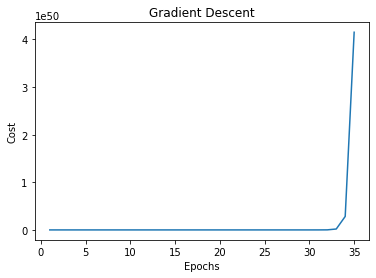

In [ ]:
plt.plot(range(1, len(reg_GD1.costs) + 1), reg_GD1.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [ ]:
w_GD1 = reg_GD1.w
w_GD1

array([1.71618459e+24, 8.37154097e+23, 9.66200343e+23, 8.28156149e+23,
       3.87163079e+23, 3.88436596e+23, 4.15517590e+23, 4.15101616e+23,
       4.71154781e+23, 4.14410600e+23])

In [ ]:
print('MSE of GD:', round(mean_squared_error(y1_test, y_pred_GD1), 6))

MSE of GD: 1.3227638202573185e+49


In [ ]:
print('R2 of GD:', round(r2_score(y1_test, y_pred_GD1), 6))

R2 of GD: -9.020336442954657e+40


In [ ]:
reg_SGD1 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD1.fit(X1_train, y1_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
w_SGD1 = np.append(reg_SGD1.intercept_, reg_SGD1.coef_)
w_SGD1

array([ 1513.64850812,  9219.94118731,  -421.62279979,  5097.3611861 ,
        1895.23040964, 21867.87435038,   641.38260501,   306.25441901,
         400.80582073,   158.68437965])

In [ ]:
y_pred_SGD1 = reg_SGD1.predict(X1_test)

In [ ]:
print('MSE of SGD:', round(mean_squared_error(y1_test, y_pred_SGD1), 6))

MSE of SGD: 34181829.98932


In [ ]:
print('R2 of SGD:', round(r2_score(y1_test, y_pred_SGD1), 6))

R2 of SGD: 0.766904


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Untitled folder/wine.csv')

In [ ]:
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(str('Is there any NaN value in the dataset: '), df_2.isnull().values.any())

Is there any NaN value in the dataset:  False


In [ ]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


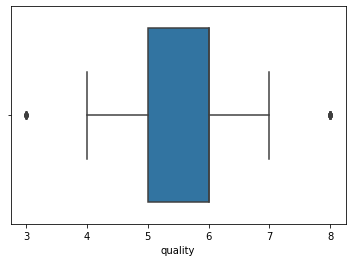

In [ ]:
sns.boxplot(x=df_2['quality'])

In [ ]:
Q1 = df_2['quality'].quantile(0.25)
Q3 = df_2['quality'].quantile(0.75)

In [ ]:
Q1

5.0

In [ ]:
Q3

6.0

In [ ]:
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [ ]:
df[((df_2['quality'] < low_fence) | (df_2['quality'] > up_fence))]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Species,Weight,Length1,Length2,Length3,Height,Width


In [ ]:
df_2 = df_2[~((df_2['quality'] < low_fence) | (df_2['quality'] > up_fence))]

In [ ]:
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_2.reset_index(drop=True, inplace=True)

In [ ]:
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1567,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1568,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1569,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
y2 = df_2['quality']
X2 = df_2.drop(columns=['quality'])

In [ ]:
X2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1566,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1567,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1568,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1569,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y2

0       5
1       5
2       5
3       6
4       5
       ..
1566    5
1567    6
1568    6
1569    5
1570    6
Name: quality, Length: 1571, dtype: int64

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [ ]:
X2_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1017,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
400,11.4,0.600,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.5
421,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9
1273,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7
598,6.3,0.360,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7
...,...,...,...,...,...,...,...,...,...,...,...
502,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2
1299,9.7,0.660,0.34,2.6,0.094,12.0,88.0,0.99796,3.26,0.66,10.1
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3
951,9.0,0.380,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9


In [ ]:
X2_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
641,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9
923,7.2,0.38,0.38,2.8,0.068,23.0,42.0,0.99356,3.34,0.72,12.9
1553,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3
247,8.2,0.60,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45,9.3
481,11.6,0.32,0.55,2.8,0.081,35.0,67.0,1.00020,3.32,0.92,10.8
...,...,...,...,...,...,...,...,...,...,...,...
1135,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1
1238,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0
1081,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5
278,11.4,0.26,0.44,3.6,0.071,6.0,19.0,0.99860,3.12,0.82,9.3


In [ ]:
y2_train

1017    5
400     6
421     5
1273    4
598     6
       ..
502     6
1299    5
43      5
951     7
1077    6
Name: quality, Length: 1099, dtype: int64

In [ ]:
y2_test

641     5
923     7
1553    5
247     5
481     7
       ..
1135    6
1238    6
1081    7
278     6
542     6
Name: quality, Length: 472, dtype: int64

In [ ]:
print('How many samples do we have in our test and train datasets?')
print('X2_train: ', np.shape(X2_train))
print('y2_train: ', np.shape(y2_train))
print('X2_test: ', np.shape(X2_test))
print('y2_test: ', np.shape(y2_test))

How many samples do we have in our test and train datasets?
X2_train:  (1099, 11)
y2_train:  (1099,)
X2_test:  (472, 11)
y2_test:  (472,)


In [ ]:
X2_train[['fixed acidity']] = min_max_scaler.fit_transform(X2_train[['fixed acidity']])
X2_test[['fixed acidity']] = min_max_scaler.fit_transform(X2_test[['fixed acidity']])
X2_train[['residual sugar']] = min_max_scaler.fit_transform(X2_train[['residual sugar']])
X2_test[['residual sugar']] = min_max_scaler.fit_transform(X2_test[['residual sugar']])
X2_train[['free sulfur dioxide']] = min_max_scaler.fit_transform(X2_train[['free sulfur dioxide']])
X2_test[['free sulfur dioxide']] = min_max_scaler.fit_transform(X2_test[['free sulfur dioxide']])
X2_train[['total sulfur dioxide']] = min_max_scaler.fit_transform(X2_train[['total sulfur dioxide']])
X2_test[['total sulfur dioxide']] = min_max_scaler.fit_transform(X2_test[['total sulfur dioxide']])
X2_train[['pH']] = min_max_scaler.fit_transform(X2_train[['pH']])
X2_test[['pH']] = min_max_scaler.fit_transform(X2_test[['pH']])
X2_train[['alcohol']] = min_max_scaler.fit_transform(X2_train[['alcohol']])
X2_test[['alcohol']] = min_max_scaler.fit_transform(X2_test[['alcohol']])
X2_train[['volatile acidity']] = min_max_scaler.fit_transform(X2_train[['volatile acidity']])
X2_test[['volatile acidity']] = min_max_scaler.fit_transform(X2_test[['volatile acidity']])
X2_train[['citric acid']] = min_max_scaler.fit_transform(X2_train[['citric acid']])
X2_test[['citric acid']] = min_max_scaler.fit_transform(X2_test[['citric acid']])
X2_train[['chlorides']] = min_max_scaler.fit_transform(X2_train[['chlorides']])
X2_test[['chlorides']] = min_max_scaler.fit_transform(X2_test[['chlorides']])
X2_train[['density']] = min_max_scaler.fit_transform(X2_train[['density']])
X2_test[['density']] = min_max_scaler.fit_transform(X2_test[['density']])
X2_train[['sulphates']] = min_max_scaler.fit_transform(X2_train[['sulphates']])
X2_test[['sulphates']] = min_max_scaler.fit_transform(X2_test[['sulphates']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
X2_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1017,0.299065,0.625000,0.00,0.219178,0.138796,0.056338,0.028269,0.621880,0.488189,0.119760,0.169811
400,0.607477,0.428571,0.49,0.123288,0.122074,0.126761,0.123675,0.685022,0.322835,0.179641,0.339623
421,0.261682,0.750000,0.20,0.075342,0.058528,0.197183,0.190813,0.398678,0.488189,0.065868,0.415094
1273,0.242991,0.566964,0.00,0.068493,0.120401,0.070423,0.021201,0.488253,0.472441,0.095808,0.188679
598,0.130841,0.214286,0.19,0.157534,0.105351,0.197183,0.116608,0.406021,0.645669,0.113772,0.754717
...,...,...,...,...,...,...,...,...,...,...,...
502,0.476636,0.419643,0.31,0.089041,0.130435,0.352113,0.197880,0.685022,0.346457,0.179641,0.283019
1299,0.448598,0.482143,0.34,0.116438,0.137124,0.154930,0.289753,0.579295,0.409449,0.197605,0.264151
43,0.299065,0.482143,0.22,0.089041,0.095318,0.112676,0.060071,0.494126,0.440945,0.520958,0.301887
951,0.383178,0.232143,0.41,0.102740,0.152174,0.070423,0.014134,0.438326,0.307087,0.149701,0.603774


In [ ]:
X2_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
641,1.000000,0.198347,0.822785,0.500000,0.101222,0.301587,0.408805,0.535565,0.104348,0.379032,1.000000
923,0.230088,0.214876,0.481013,0.126984,0.052356,0.317460,0.226415,0.197490,0.417391,0.282258,0.692308
1553,0.141593,0.363636,0.113924,0.039683,0.026178,0.333333,0.163522,0.235983,0.591304,0.185484,0.446154
247,0.318584,0.396694,0.215190,0.087302,0.059337,0.126984,0.421384,0.426778,0.295652,0.064516,0.138462
481,0.619469,0.165289,0.696203,0.126984,0.075044,0.507937,0.383648,0.753138,0.400000,0.443548,0.369231
...,...,...,...,...,...,...,...,...,...,...,...
1135,0.442478,0.247934,0.443038,0.071429,0.078534,0.222222,0.201258,0.420084,0.321739,0.233871,0.415385
1238,0.212389,0.380165,0.354430,0.285714,0.082024,0.142857,0.396226,0.429289,0.400000,0.266129,0.400000
1081,0.300885,0.157025,0.569620,0.071429,0.310646,0.031746,0.062893,0.199163,0.252174,0.354839,0.630769
278,0.601770,0.115702,0.556962,0.190476,0.057592,0.047619,0.081761,0.619247,0.226087,0.362903,0.138462


In [ ]:
reg2 = LinearRegression()
reg2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred2 = reg2.predict(X2_test)

In [ ]:
print('Model intercept: ', reg2.intercept_)
print('Model coefficients: ', reg2.coef_)

Model intercept:  5.619004248375595
Model coefficients:  [ 0.33978462 -1.02407132 -0.17362823  0.49312014 -0.77918428  0.2180222
 -0.92144898 -0.17019525 -0.38502045  1.24828343  1.42982131]


In [ ]:
r2_score(y2_test, y_pred2)

0.3464008753179725

In [ ]:
mean_squared_error(y2_test, y_pred2)

0.3330162410306917

In [ ]:
class GD2_LinearRegression:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    def net_input(self, X2):
        return np.dot(X2, self.w[1:]) + self.w[0]
    def predict(self, X2):
        return self.net_input(X2)
    def fit(self, X2, y2):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X2.shape[1])
        self.costs = [ ]
        for n_iters in range(self.max_iter):
            error = y2 - self.predict(X2)
            self.w[1:] += self.eta * X2.T.dot(error)
            self.w[0] += self.eta * error.sum()
            cost = (error**2).sum()/2
            self.costs.append(cost)

In [ ]:
reg_GD2 = GDLinearRegression(eta=0.001, max_iter=20, random_state=1)
reg_GD2.fit(X2_train, y2_train)

In [ ]:
y_pred_GD2 = reg_GD2.predict(X2_test)

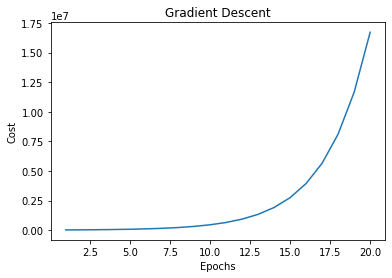

In [ ]:
plt.plot(range(1, len(reg_GD2.costs) + 1), reg_GD2.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [ ]:
w_GD2 = reg_GD2.w
w_GD2

array([-101.03495331,  -33.41181401,  -37.34280288,  -28.55503579,
        -11.93154499,  -12.99732014,  -21.55746606,  -14.87410697,
        -51.23487509,  -45.57828284,  -19.87462343,  -32.34920831])

In [ ]:
print('MSE of GD:', round(mean_squared_error(y2_test, y_pred_GD2), 6))

MSE of GD: 42802.015868


In [ ]:
print('R2 of GD:', round(r2_score(y2_test, y_pred_GD2), 6))

R2 of GD: -84004.99328


In [ ]:
reg_SGD2 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD2.fit(X2_train, y2_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
w_SGD2 = np.append(reg_SGD2.intercept_, reg_SGD2.coef_)
w_SGD2

array([3.191047  , 0.74072248, 0.38821719, 0.72450146, 0.16050606,
       0.22824568, 0.35196131, 0.0429466 , 0.85264202, 1.3419774 ,
       0.71655532, 1.69253664])

In [ ]:
y_pred_SGD2 = reg_SGD2.predict(X2_test)

In [ ]:
print('MSE of SGD:', round(mean_squared_error(y2_test, y_pred_SGD2), 6))

MSE of SGD: 0.479142


In [ ]:
print('R2 of SGD:', round(r2_score(y2_test, y_pred_SGD2), 6))

R2 of SGD: 0.059606


In [12]:
df_3 = pd.read_csv('/content/drive/MyDrive/Untitled folder/weather.csv')

In [13]:
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [14]:
print(str('Is there any NaN value in the dataset: '), df_3.isnull().values.any())

Is there any NaN value in the dataset:  False


In [18]:
countNULL = df_3.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

In [20]:
df_3_remove = df_3.dropna(inplace=False)

In [21]:
df_3_remove

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [23]:
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [24]:
df_3.dropna(inplace=True)

In [25]:
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


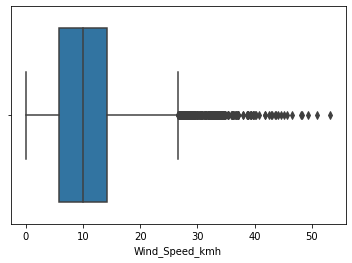

In [26]:
sns.boxplot(df_3['Wind_Speed_kmh'])

In [28]:
Q1 = df_3['Wind_Speed_kmh'].quantile(0.25)
Q3 = df_3['Wind_Speed_kmh'].quantile(0.75)

In [29]:
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [32]:
df_3[((df_3['Wind_Speed_kmh'] < low_fence) | (df_3['Wind_Speed_kmh'] > up_fence))]

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
50,9.050000,0.61,44.6292,309,11.4954,1019.96,1,Normal
56,12.788889,0.78,34.6955,150,9.8693,993.93,1,Normal
71,6.088889,0.65,34.6311,309,10.0464,1009.67,1,Normal
87,7.316667,0.77,32.8118,10,9.9820,1016.11,1,Normal
182,10.000000,0.89,32.2000,330,16.1000,999.50,1,Normal
...,...,...,...,...,...,...,...,...
9847,15.038889,0.42,32.8923,309,9.9820,1024.48,1,Normal
9867,1.111111,0.85,28.5292,310,11.2056,1011.01,1,Cold
9904,6.022222,0.79,40.0568,160,10.3684,1000.44,1,Normal
9954,16.016667,0.27,49.3948,300,9.9820,1014.29,1,Normal


In [33]:
df_3[~((df_3['Wind_Speed_kmh'] < low_fence) | (df_3['Wind_Speed_kmh'] > up_fence))]

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [34]:
df_3.reset_index(drop=True, inplace=True)
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [35]:
name_col = 'Description'

In [36]:
data_new = onehot_encoder.fit_transform(df_3[[name_col]])
region_column = pd.DataFrame(data=data_new, columns=onehot_encoder.get_feature_names([name_col]))

In [38]:
df_3 = pd.concat([df_3.drop(columns=[name_col, 'Temperature_c']), region_column, df_3['Temperature_c']], axis=1)
df_3

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm,Temperature_c
0,0.92,11.2700,130,8.0500,1021.60,0,1.0,0.0,0.0,-0.555556
1,0.73,20.9300,330,16.1000,1017.00,1,0.0,0.0,1.0,21.111111
2,0.97,5.9731,193,14.9086,1013.99,1,0.0,1.0,0.0,16.600000
3,0.82,3.2200,300,16.1000,1031.59,1,1.0,0.0,0.0,1.600000
4,0.60,10.8836,116,9.9820,1020.88,1,1.0,0.0,0.0,2.194444
...,...,...,...,...,...,...,...,...,...,...
9995,0.95,10.2396,20,4.0089,1007.41,1,0.0,1.0,0.0,10.022222
9996,0.64,11.0446,80,9.9820,1031.33,1,0.0,1.0,0.0,8.633333
9997,0.93,11.0446,269,14.9086,1014.21,1,0.0,1.0,0.0,5.977778
9998,0.78,8.1788,231,7.8246,1005.02,1,0.0,1.0,0.0,9.788889


In [39]:
X3 = df_3.drop(columns=['Temperature_c'])
y3 = df_3['Temperature_c']

In [40]:
X3

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
0,0.92,11.2700,130,8.0500,1021.60,0,1.0,0.0,0.0
1,0.73,20.9300,330,16.1000,1017.00,1,0.0,0.0,1.0
2,0.97,5.9731,193,14.9086,1013.99,1,0.0,1.0,0.0
3,0.82,3.2200,300,16.1000,1031.59,1,1.0,0.0,0.0
4,0.60,10.8836,116,9.9820,1020.88,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.95,10.2396,20,4.0089,1007.41,1,0.0,1.0,0.0
9996,0.64,11.0446,80,9.9820,1031.33,1,0.0,1.0,0.0
9997,0.93,11.0446,269,14.9086,1014.21,1,0.0,1.0,0.0
9998,0.78,8.1788,231,7.8246,1005.02,1,0.0,1.0,0.0


In [41]:
y3

0       -0.555556
1       21.111111
2       16.600000
3        1.600000
4        2.194444
          ...    
9995    10.022222
9996     8.633333
9997     5.977778
9998     9.788889
9999    11.138889
Name: Temperature_c, Length: 10000, dtype: float64

In [42]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)

In [43]:
X3_train

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
4441,0.91,8.4525,308,9.9820,1025.04,1,1.0,0.0,0.0
5556,0.32,12.8800,330,9.9820,1023.20,1,0.0,0.0,1.0
5779,0.92,2.0930,108,4.7495,1016.66,1,0.0,1.0,0.0
9612,0.71,6.4400,130,16.1000,1012.80,1,0.0,0.0,1.0
2755,0.84,6.7942,318,15.1501,1020.77,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4058,0.28,13.1859,160,10.3684,1009.07,1,0.0,0.0,1.0
6288,0.88,6.2951,301,0.9338,1041.07,0,1.0,0.0,0.0
21,0.35,11.2700,40,16.1000,1018.01,1,0.0,0.0,1.0
3143,0.93,3.6708,273,3.0912,1010.31,1,0.0,1.0,0.0


In [44]:
X3_test

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
9541,0.87,6.1502,40,15.7297,1018.44,1,0.0,1.0,0.0
8167,0.32,11.4954,332,10.3523,1014.04,1,0.0,0.0,1.0
8857,0.90,1.4651,255,9.9820,1021.28,1,0.0,0.0,1.0
1000,0.57,3.4132,334,9.9820,1016.84,1,0.0,1.0,0.0
8536,0.96,18.7404,170,1.8193,1007.46,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9562,0.92,15.2306,129,4.7334,1021.29,0,1.0,0.0,0.0
2710,0.70,9.6600,230,9.9820,1019.30,1,0.0,1.0,0.0
9107,0.57,9.4829,287,9.9820,1032.30,1,0.0,1.0,0.0
5371,0.96,0.0000,0,9.9820,1019.29,1,0.0,1.0,0.0


In [45]:
y3_train

4441     2.288889
5556    23.888889
5779     5.138889
9612    20.555556
2755    -7.500000
          ...    
4058    22.083333
6288    -4.977778
21      21.200000
3143     8.983333
4664    -3.827778
Name: Temperature_c, Length: 7000, dtype: float64

In [46]:
y3_test

9541    12.105556
8167    29.772222
8857    18.827778
1000    16.000000
8536     7.672222
          ...    
9562    -3.694444
2710     5.000000
9107    10.116667
5371    13.800000
1269    -1.222222
Name: Temperature_c, Length: 3000, dtype: float64

In [47]:
X3_train[['Wind_Speed_kmh']] = min_max_scaler.fit_transform(X3_train[['Wind_Speed_kmh']])
X3_test[['Wind_Speed_kmh']] = min_max_scaler.fit_transform(X3_test[['Wind_Speed_kmh']])
X3_train[['Wind_Bearing_degrees']] = min_max_scaler.fit_transform(X3_train[['Wind_Bearing_degrees']])
X3_test[['Wind_Bearing_degrees']] = min_max_scaler.fit_transform(X3_test[['Wind_Bearing_degrees']])
X3_train[['Visibility_km']] = min_max_scaler.fit_transform(X3_train[['Visibility_km']])
X3_test[['Visibility_km']] = min_max_scaler.fit_transform(X3_test[['Visibility_km']])
X3_train[['Pressure_millibars']] = min_max_scaler.fit_transform(X3_train[['Pressure_millibars']])
X3_test[['Pressure_millibars']] = min_max_scaler.fit_transform(X3_test[['Pressure_millibars']])
X3_train[['Pressure_millibars']] = min_max_scaler.fit_transform(X3_train[['Pressure_millibars']])
X3_test[['Pressure_millibars']] = min_max_scaler.fit_transform(X3_test[['Pressure_millibars']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [59]:
X3_train

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
4441,0.91,0.165824,0.857939,0.620,0.980543,1,1.0,0.0,0.0
5556,0.32,0.252685,0.919220,0.620,0.978783,1,0.0,0.0,1.0
5779,0.92,0.041061,0.300836,0.295,0.972527,1,0.0,1.0,0.0
9612,0.71,0.126342,0.362117,1.000,0.968834,1,0.0,0.0,1.0
2755,0.84,0.133291,0.885794,0.941,0.976458,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4058,0.28,0.258686,0.445682,0.644,0.965266,1,0.0,0.0,1.0
6288,0.88,0.123500,0.838440,0.058,0.995877,0,1.0,0.0,0.0
21,0.35,0.221099,0.111421,1.000,0.973818,1,0.0,0.0,1.0
3143,0.93,0.072015,0.760446,0.192,0.966452,1,0.0,1.0,0.0


In [60]:
X3_test

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
9541,0.87,0.115513,0.111421,0.977,0.975648,1,0.0,1.0,0.0
8167,0.32,0.215906,0.924791,0.643,0.971433,1,0.0,0.0,1.0
8857,0.90,0.027517,0.710306,0.620,0.978369,1,0.0,0.0,1.0
1000,0.57,0.064106,0.930362,0.620,0.974115,1,0.0,1.0,0.0
8536,0.96,0.351981,0.473538,0.113,0.965129,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9562,0.92,0.286060,0.359331,0.294,0.978378,0,1.0,0.0,0.0
2710,0.70,0.181433,0.640669,0.620,0.976472,1,0.0,1.0,0.0
9107,0.57,0.178107,0.799443,0.620,0.988926,1,0.0,1.0,0.0
5371,0.96,0.000000,0.000000,0.620,0.976462,1,0.0,1.0,0.0


In [61]:
reg3 = LinearRegression()
reg3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred3 = reg3.predict(X3_test)

In [63]:
print('Model intercept: ', reg3.intercept_)
print('Model coefficients: ', reg3.coef_)

Model intercept:  -23478530478883.164
Model coefficients:  [-7.96752315e+00 -3.76700319e+00  2.81196060e-01  1.06298829e+00
  2.17283230e-01  5.59836914e+00  2.34785305e+13  2.34785305e+13
  2.34785305e+13]


In [64]:
r2_score(y3_test, y_pred3)

0.868536126330364

In [65]:
mean_squared_error(y3_test, y_pred3)

11.940996419136567

In [91]:
class GD_LinearRegression:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    def net_input(self, X3):
        return np.dot(X3, self.w[1:]) + self.w[0]
    def predict(self, X3):
        return self.net_input(X3)
    def fit(self, X3, y3):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X3.shape[1])
        self.costs = [ ]
        for n_iters in range(self.max_iter):
            error = y3 - self.predict(X3)
            self.w[1:] += self.eta * X3.T.dot(error)
            self.w[0] += self.eta * error.sum()
            cost = (error**2).sum()/2
            self.costs.append(cost)

In [98]:
reg_GD3 = GD_LinearRegression(eta=0.25, max_iter=20, random_state=1)
reg_GD3.fit(X3_train, y3_train)

In [99]:
y_pred_GD3 = reg_GD3.predict(X3_test)

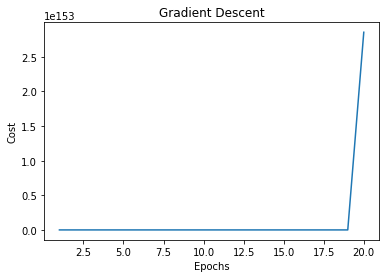

In [100]:
plt.plot(range(1, len(reg_GD3.costs) + 1), reg_GD3.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [101]:
w_GD3 = reg_GD3.w
w_GD3

array([-1.57033249e+78, -1.15955228e+78, -3.36276930e+77, -8.35058386e+77,
       -1.03383863e+78, -1.51300432e+78, -1.44041041e+78, -3.46051833e+77,
       -8.44490285e+77, -3.79790370e+77])

In [102]:
print('MSE of GD:', mean_squared_error(y3_test, y_pred_GD3))

MSE of GD: 4.8597132655432976e+157


In [103]:
print('R2 of GD:', r2_score(y3_test, y_pred_GD3))

R2 of GD: -5.350279896141481e+155


In [79]:
reg_SGD3 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD3.fit(X3_train, y3_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [80]:
w_SGD3 = np.append(reg_SGD3.intercept_, reg_SGD3.coef_)
w_SGD3

array([ 6.56099172, -6.30199462, -2.49483651,  0.32839014,  1.43701546,
        2.38584022,  5.8389062 , -7.11106822,  1.25279329, 12.35282375])

In [81]:
y_pred_SGD3 = reg_SGD3.predict(X3_test)

In [82]:
print('MSE of SGD:', mean_squared_error(y3_test, y_pred_SGD3))

MSE of SGD: 12.115304873546172


In [83]:
print('R2 of SGD:', r2_score(y3_test, y_pred_SGD3))

R2 of SGD: 0.8666170850857549
